In [44]:
# Dependencies
# keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU, Input, Dropout
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# import matplotlib for visualization
import matplotlib.pyplot as plt

# import numpy
import numpy as np

In [4]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Check the shape of the data
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
# normalize the input (image)
print(x_train[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
print(type(x_train), x_train.shape)
print(type(x_test), x_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (10000, 28, 28)


In [12]:
# x_train = x_train.reshape((-1, 28, 28, 1))
# x_test = x_test.reshape((-1, 28, 28, 1))
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [14]:
print(type(x_train), x_train.shape)
print(type(x_test), x_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28, 1)
<class 'numpy.ndarray'> (10000, 28, 28, 1)


In [15]:
label = y_train[0]
print(label)
print(type(label))

9
<class 'numpy.uint8'>


In [16]:
# normalize the output (labels)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [17]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [19]:
fashion_mnist_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(fashion_mnist_classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [21]:
def plot_image(image, title=None, cmap="gray"):
    plt.imshow(image, cmap=cmap)
    if title:
        plt.title(title)
    plt.show()

In [22]:
# See first training sample
image, label = x_train[0], y_train[0]
# The shape of the image tensor is [1, 28, 28] or more specifically: [color_channels=1, height=28, width=28]
print(type(image), image.shape)
print(type(label))

<class 'numpy.ndarray'> (28, 28, 1)
<class 'numpy.uint8'>


Image shape: (28, 28)


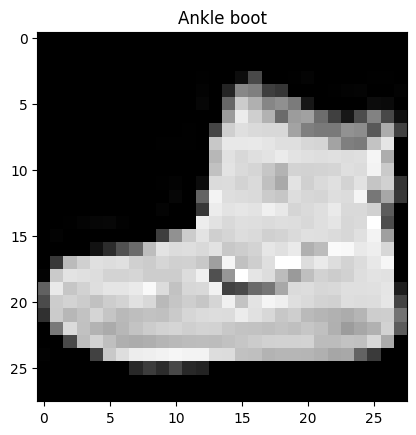

In [23]:
# get first sample
image, label = x_train[0], y_train[0]
image = np.squeeze(image, axis=-1)
title = fashion_mnist_classes[label]
print(f"Image shape: {image.shape}")

plot_image(image, title)

In [43]:
def create_fashion_mnist_convnet(input_shape, num_classes):
    model = Sequential()

    # Input layer
    model.add(Input(shape=input_shape))
    
    # ConvNet Block 1
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # ConvNet Block 2
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Classifier
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes, activation='softmax'))
    
    # return model
    return model
    

# Example usage:
input_shape = (28, 28, 1)
num_classes = 10  # Number of classes for FashionMNIST

model = create_fashion_mnist_convnet(input_shape, num_classes)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [45]:
# Compile the model
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# training data
x_train_partial = x_train
y_train_partial = y_train_one_hot

# validation data
x_val = x_test
y_val = y_test_one_hot

In [84]:
print(x_train_partial.shape)
print(y_train_partial.shape)

(60000, 28, 28, 1)
(60000, 10)


In [47]:
# Training the model
batch_size = 128
epochs = 15

history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Epoch 1/15
469/469 [==============================] - 7s 14ms/step - loss: 0.6810 - accuracy: 0.7555 - val_loss: 0.4639 - val_accuracy: 0.8332
Epoch 2/15
469/469 [==============================] - 6s 14ms/step - loss: 0.4529 - accuracy: 0.8375 - val_loss: 0.4093 - val_accuracy: 0.8531
Epoch 3/15
469/469 [==============================] - 7s 14ms/step - loss: 0.4016 - accuracy: 0.8552 - val_loss: 0.3628 - val_accuracy: 0.8716
Epoch 4/15
469/469 [==============================] - 7s 14ms/step - loss: 0.3720 - accuracy: 0.8662 - val_loss: 0.3466 - val_accuracy: 0.8773
Epoch 5/15
469/469 [==============================] - 7s 14ms/step - loss: 0.3515 - accuracy: 0.8726 - val_loss: 0.3287 - val_accuracy: 0.8842
Epoch 6/15
469/469 [==============================] - 6s 14ms/step - loss: 0.3349 - accuracy: 0.8792 - val_loss: 0.3191 - val_accuracy: 0.8876
Epoch 7/15
469/469 [==============================] - 7s 14ms/step - loss: 0.3224 - accuracy: 0.8839 - val_loss: 0.3081 - val_accuracy: 0.8917

In [48]:
history.history

{'loss': [0.6809802055358887,
  0.45293673872947693,
  0.40157267451286316,
  0.37203797698020935,
  0.3514755666255951,
  0.3348759114742279,
  0.3224303722381592,
  0.3114989399909973,
  0.30209872126579285,
  0.2949383556842804,
  0.28886276483535767,
  0.28311872482299805,
  0.27839890122413635,
  0.2733011245727539,
  0.2705715596675873],
 'accuracy': [0.755466639995575,
  0.8375333547592163,
  0.8551999926567078,
  0.8662333488464355,
  0.8726166486740112,
  0.8792166709899902,
  0.8839166760444641,
  0.8880333304405212,
  0.8898666501045227,
  0.8928166627883911,
  0.8947166800498962,
  0.897683322429657,
  0.8981833457946777,
  0.9003000259399414,
  0.901283323764801],
 'val_loss': [0.4639100730419159,
  0.4093339145183563,
  0.36282166838645935,
  0.3465624153614044,
  0.32865360379219055,
  0.31909260153770447,
  0.3080543577671051,
  0.30027779936790466,
  0.2905649244785309,
  0.28969454765319824,
  0.29858866333961487,
  0.2765721380710602,
  0.2937999367713928,
  0.271643

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
def plot_loss(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    print(epochs)

    # Visualize the loss
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    print(epochs)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

range(1, 16)


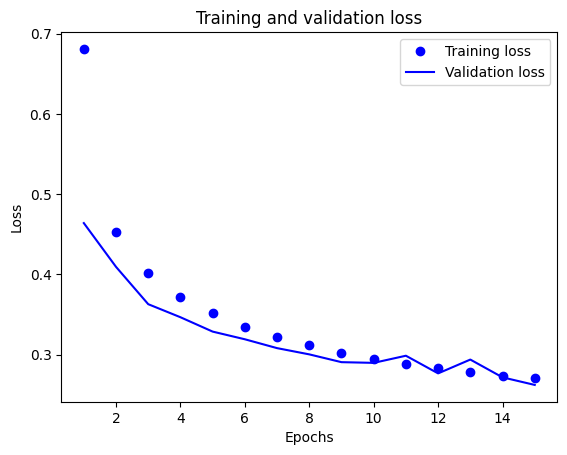

In [51]:
plot_loss(history_dict)

range(1, 16)


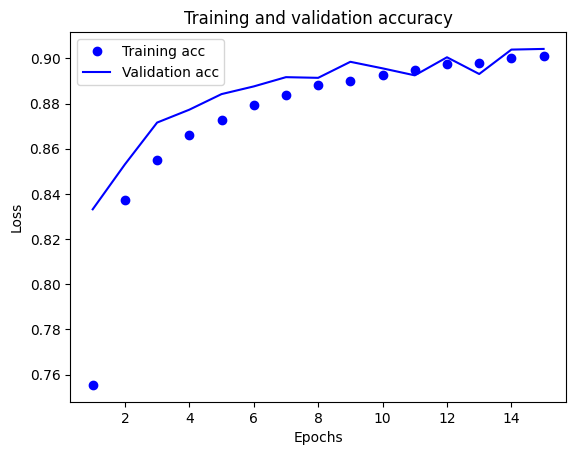

In [52]:
plot_accuracy(history_dict)

In [53]:
results = model.evaluate(x_test, y_test_one_hot)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.2622 - accuracy: 0.9042
[0.262201726436615, 0.90420001745224]


In [55]:
# predict
x_pred = x_test[:10]
y_pred = y_test[:10]

print('input')
# print(x_pred)
print(y_pred)

predictions = model.predict(x_pred)
print('prediction')
print(predictions.shape)
print(predictions)
print(np.argmax(predictions, axis=1))

input
[9 2 1 1 6 1 4 6 5 7]
1/1 [==============================] - 0s 13ms/step
prediction
(10, 10)
[[6.67562631e-07 2.96213587e-09 9.44152418e-08 6.31768913e-08
  2.85439370e-07 7.80930102e-04 4.93554467e-07 2.43202737e-03
  6.02390792e-05 9.96725261e-01]
 [3.06739908e-04 3.59542418e-09 9.99507666e-01 1.59441277e-06
  3.84005871e-05 5.39462780e-11 1.45529877e-04 1.31605785e-11
  3.95046058e-08 4.08738323e-08]
 [4.54098981e-08 9.99999881e-01 6.88792934e-09 2.85525061e-08
  4.31613358e-08 4.10323511e-11 1.07349141e-09 5.33486666e-13
  1.17223058e-08 1.52730877e-12]
 [1.51968209e-07 9.99995232e-01 2.22113883e-08 4.04605817e-06
  4.95793643e-07 2.76722734e-08 3.79718408e-08 2.15936297e-10
  7.72259270e-08 2.87109364e-10]
 [1.73580080e-01 5.54184662e-05 2.26737857e-02 1.70975458e-02
  6.05633222e-02 6.03696719e-07 7.26002753e-01 2.69736120e-07
  2.55816885e-05 6.00995691e-07]
 [3.74761100e-07 9.99999046e-01 5.87604667e-08 1.53406148e-07
  2.73949524e-07 1.07445469e-10 1.61235238e-08 8.2038